# Machine Learning Project : Personal Loan Campaign to Personal Loan Conversions

**Problem Statement**

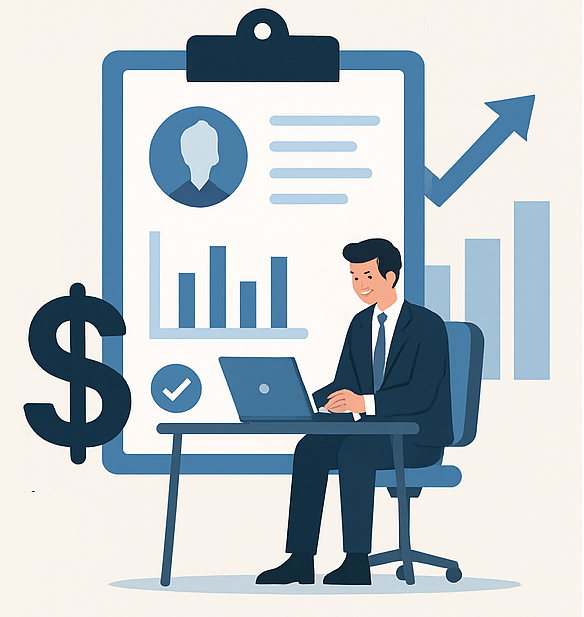

In the evolving landscape of retail banking, AllLife Bank aims to increase its asset base by encouraging existing depositors (liability customers) to take personal loans. While the bank has a robust base of depositors, the number of borrowers is still limited. To grow its loan portfolio and enhance revenue through interest income, the bank's management is focusing on converting liability customers into personal loan customers, without losing them as depositors.

A marketing campaign conducted last year resulted in a 9% conversion rate, which sparked interest in more refined and data-driven approaches. Now, the marketing team is looking to leverage machine learning models to better identify which liability customers are most likely to take a loan. The goal is to improve campaign targeting, reduce customer acquisition cost, and increase loan conversions.

**Objective**

As a Data Scientist, the task is to build a predictive model that can:

*   Identify liability customers with a high likelihood of purchasing personal loans
*   Understand key customer attributes that influence loan purchase decisions
*   Enable better segmentation and targeting for future marketing efforts

**Data Dictionary**

*   **ID:** Customer ID
*   **Age:** Customer’s age in completed years
*   **Experience:** # years of professional experience
*   **Income:** Annual income of the customer (in thousand dollars)
*   **ZIP Code:** Home Address ZIP code
*   **Family:** The family size of the customer
*   **CCAvg:** Average spending on credit cards per month (in thousand dollars)
*   **Education:** Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
*   **Mortgage:** Value of house mortgage if any (in thousand dollars)
*   **Personal_Loan:** Did this customer accept the personal loan offered in the last campaign?
*   **Securities_Account:** Does the customer have a securities account with the bank?
*   **CD_Account:** Does the customer have a certificate of deposit (CD) account with the bank?
*   **Online:** Do customers use Internet banking facilities?
*   **CreditCard:** Does the customer use a credit card issued by any other Bank (excluding AllLife Bank)?

#Importing

Importing the Libraries Drive and Data

In [ ]:
#Importing the numpy and pandas libraries
import numpy as np
import pandas as pd

#Importing the libraries required for viualization
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the libraries required for Decision Tree Model Building
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Importing the libraries required for Decision Tree plotting
from sklearn.tree import plot_tree

#Importing the libraries required for Decision Tree Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score


In [ ]:
# Importing the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Data
path= '/content/drive/MyDrive/Colab Notebooks/Machine Learning Module/Data/Loan_Modelling.csv'
df= pd.read_csv(path)

#Data Analysis

In [ ]:
# Creating a copy of the original data
data= df.copy()

In [ ]:
# Visualizing first 5 rows of the data
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# Visualizing first last 5 rows of the data
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
# Computing the number of rows and columns
data.shape

(5000, 14)

In [ ]:
# Visualizing, datatype of the variables & number of null values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Computing statistical aspects of the data
data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
data.duplicated().sum()

np.int64(0)

**Data Analysis Observations**


*   The Dataset comprises of 5000 rows and 14 columns
*   We have 13 interger type variables and 1 float type variables
*   There are no nul values in the data set
*   There are no duplicate rows in the dataset.
*   The average ages of the customers in scope is approximately 45 years
*   The average experience level of the customers in scope is appraximately 20 years
*   The average salary levels of the customers in scope is approximately 73 thousand dollars
*   The average family size of the customers in scope is approximately 2
*   The average credit card spends of the customer for a month is around 2 thousand dollars
*   On an average the customers in scope have a houisng mortagauge of around 45 thousand dollars.














#Data Cleaning

In [ ]:
# locating variables with all unique values
data['ID'].nunique()

5000

In [ ]:
# Dropping variable ID from the dataset
data.drop('ID', axis=1, inplace=True)

In [ ]:
# converting 0 and 1 to yes & no

data['Personal_Loan'] = data['Personal_Loan'].map({1: 'Yes', 0: 'No'})
print(data.head())

   Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   25           1      49    91107       4    1.6          1         0   
1   45          19      34    90089       3    1.5          1         0   
2   39          15      11    94720       1    1.0          1         0   
3   35           9     100    94112       1    2.7          2         0   
4   35           8      45    91330       4    1.0          2         0   

  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0            No                   1           0       0           0  
1            No                   1           0       0           0  
2            No                   0           0       0           0  
3            No                   0           0       0           0  
4            No                   0           0       0           1  


#Univariate Analysis

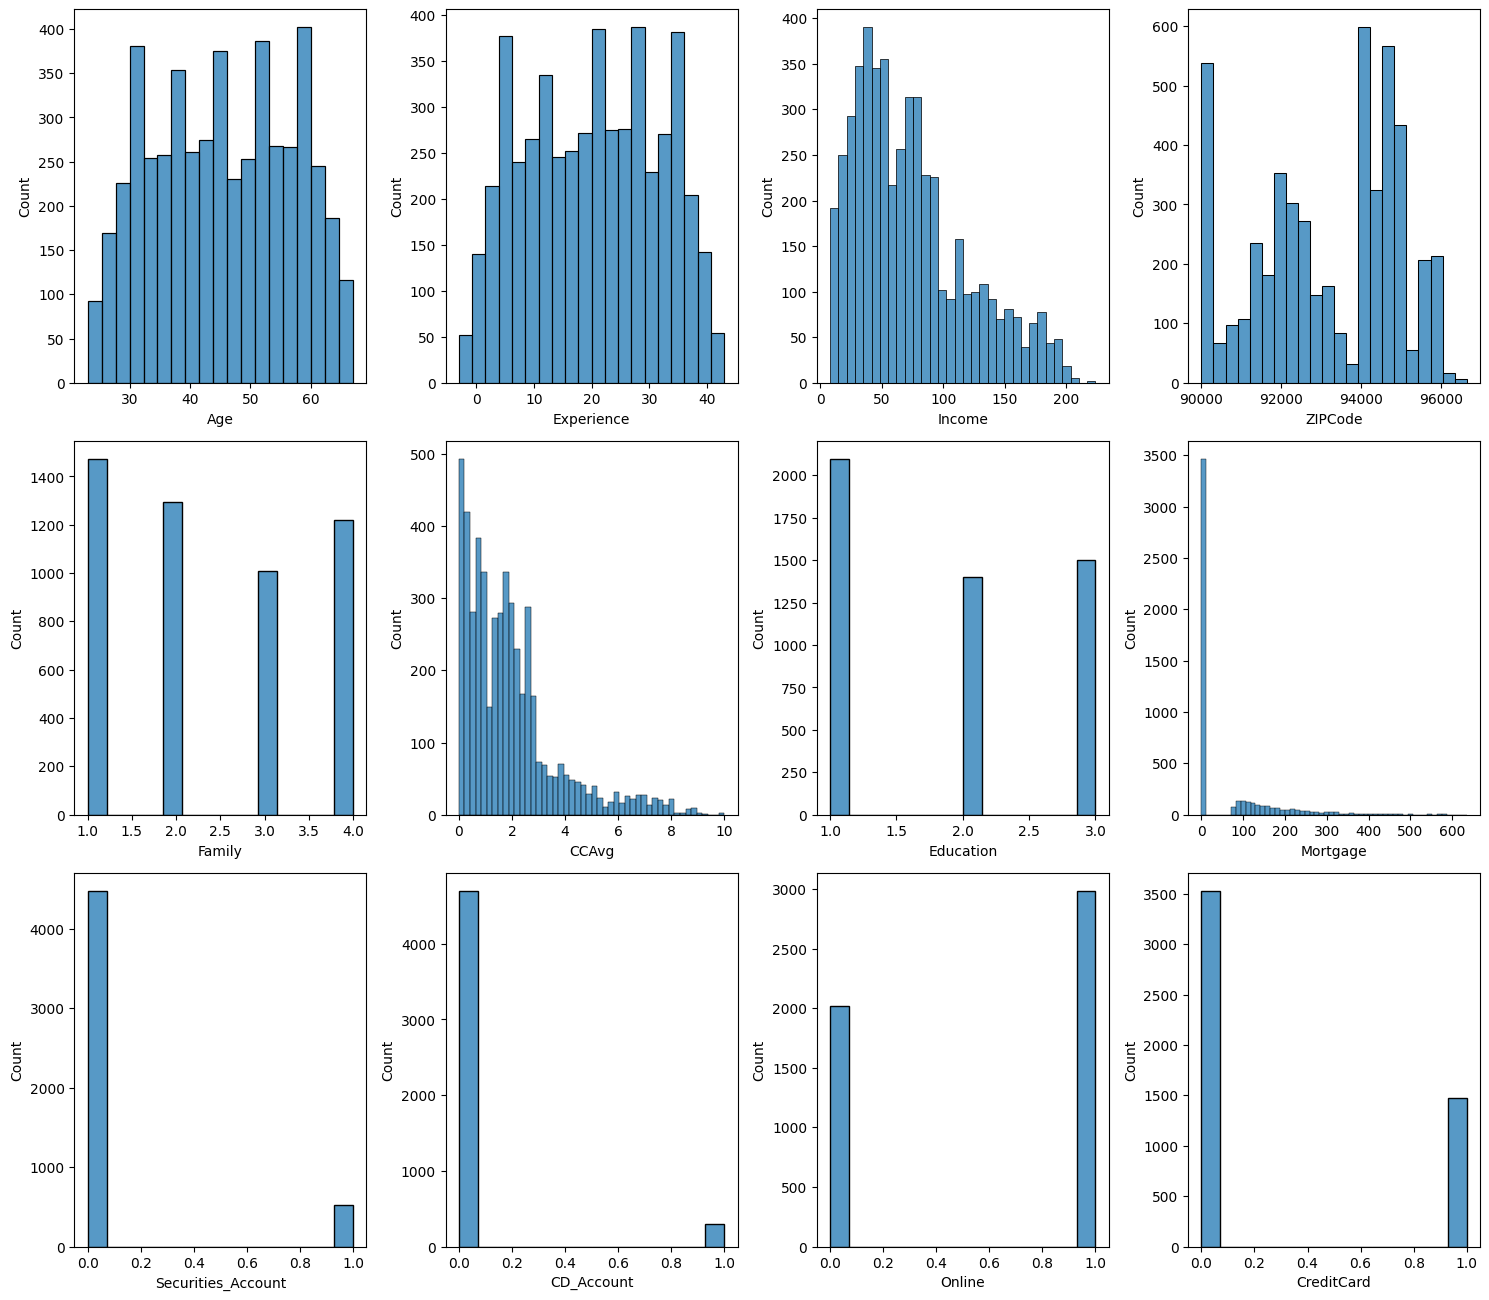

In [ ]:
plt.figure(figsize=(15,17))
features= data.select_dtypes(include=['number']).columns.tolist()
for i, feature in enumerate(features):
  plt.subplot(4,4,i+1)
  sns.histplot(data= data, x=feature)
plt.tight_layout()
plt.show()

**Univariate Analysis Histogram Plot Observations**

**Continuous/Numerical Variables:**

**Age:** Fairly uniformly distributed between ~25 to 65, No strong skewness; likely a well-distributed age sample.

**Experience:** Roughly symmetric distribution from 0 to 40 years, Slight dip at the extremes, with more people in the 10–30 year range.

**Income:** Right-skewed distribution (majority under $100k), A few high-income outliers.

**CCAvg (Credit Card Average Spending):** Strong right skew. Most customers spend less than $2,000 monthly.

**Mortgage:** Strong right skew. Most have no or low mortgage values, few with high ones.

**ZIP Code:** Multi-modal distribution.Suggests customers are concentrated in a few ZIP codes.

**Categorical/Discrete Variables:**

**Family:** Most families have 1 or 2 members. Fewer customers with families of size 3 or 4.

**Education:** Categories 1 and 2 dominate (e.g., high school and college). Few in the highest education bracket (3).

**Securities Account, CD Account, CreditCard:** Highly imbalanced; majority do not have these accounts/cards. Could be potential for cross-selling.

**Online:** Mixed adoption; slightly more users prefer online banking, but still a considerable offline base.

**Observations Summary:**
**Skewed Features:** Income, CCAvg, Mortgage – right-skewed, suggesting a few high-value outliers.

**Balanced Features:** Age and Experience – relatively even.

**Marketing Opportunity:**


*   Most do not have CD/Securities/Credit Card, indicating opportunity for product penetration.
*   Split in Online usage indicates a chance to increase digital adoption.
*   Segment-wise Targeting
*   Education level 1 and 2 dominate – promotions can be tailored accordingly.
*   ZIPCode shows distinct customer clusters.

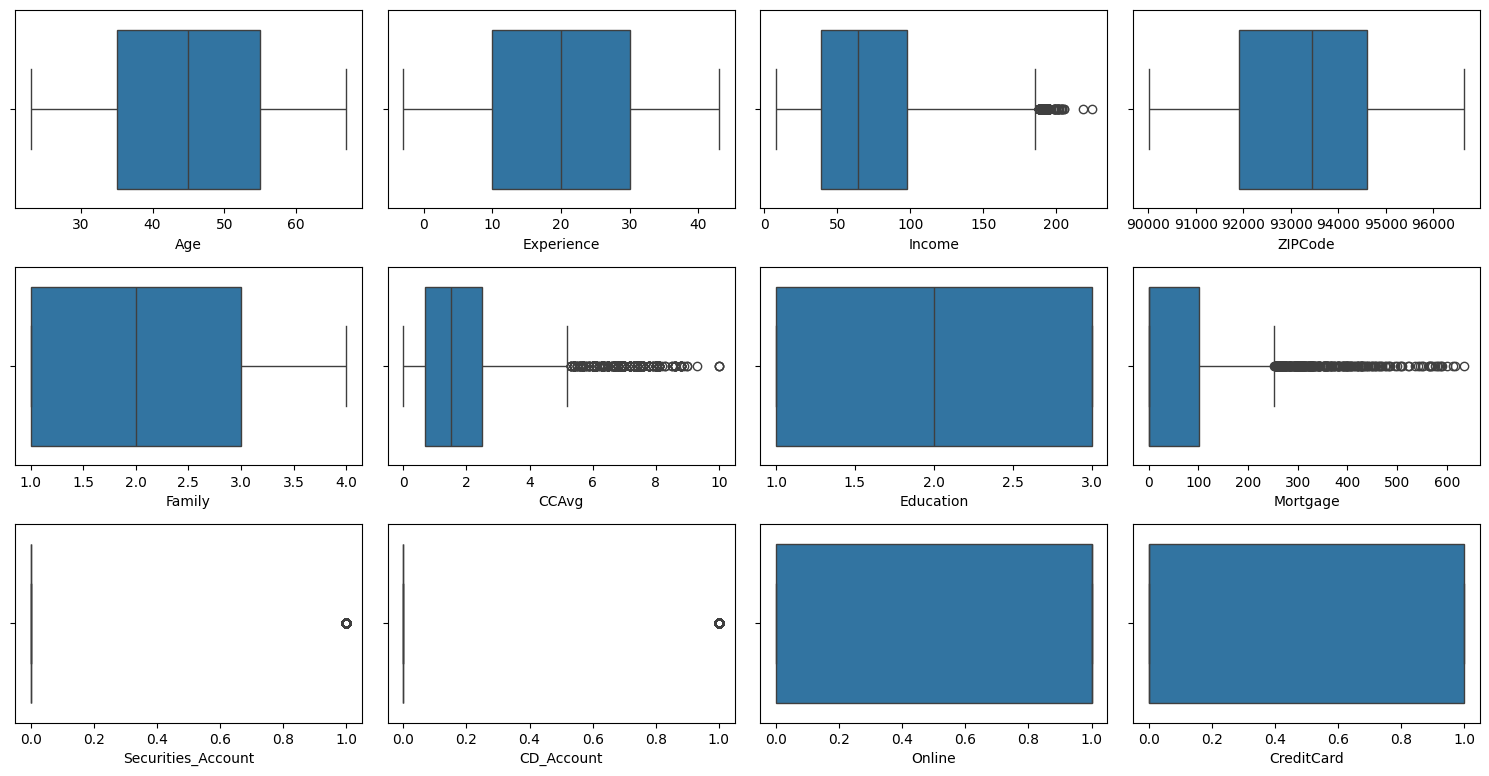

In [ ]:
plt.figure(figsize=(15,10))

features= data.select_dtypes(include=['number']).columns.tolist()
for i, feature in enumerate(features):
  plt.subplot(4,4,i+1)
  sns.boxplot(data= data, x=feature)
plt.tight_layout()
plt.show()

**Univariate Analysis Box Plot Observations**

**Boxplot Analysis & Inferences**

**Continuous Variables**

*   **Age:** Fairly symmetric distribution. No significant outliers.Median age around 45 years.
*   **Experience:** Symmetrical with no visible outliers. Median around 20 years.Spread is even.
*   **Income:** Right-skewed distribution. Clear outliers on the higher end (>150k).
Majority earn less than 100k.
*   **ZIP Code:** No outliers. Concentrated within a tight range (~91000–96000 median around 93500.
*   **CCAvg (Credit Card Spending):** Strong right-skew. Many outliers above 4 (thousands). Median under 2k, so most people spend low amounts.
*   **Mortgage:** Extremely right-skewed. Many outliers on the higher side.Most customers have little or no mortgage.

**Categorical/Numeric Discrete Variables**
*   **Family:** Even spread from 1 to 4.No outliers (as expected for discrete counts).
*   **Education:** Categorical variable (1, 2, 3). Median is 2; spread from 1 to 3.
No outliers — as expected.
*   **Securities_Account, CD_Account, Online, CreditCard:** All binary (0 or 1).Some 1s are shown as individual dots (due to low proportion). Most users have values of 0 (i.e., they don’t have these accounts/services).


**Insights & Implications**

**Outliers to Handle:** Income, CCAvg, and Mortgage have many outliers. These may affect models like linear regression.

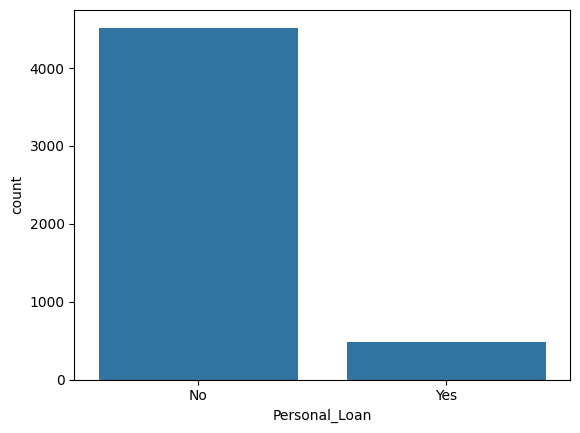

In [ ]:
sns.countplot(data= data, x= 'Personal_Loan');

### Categorical Univariate Analysis Observations

**Class Imbalance:** A large majority around (90%) of customers did not take a personal loan. Only a small fraction around (10%) did take a personal loan.

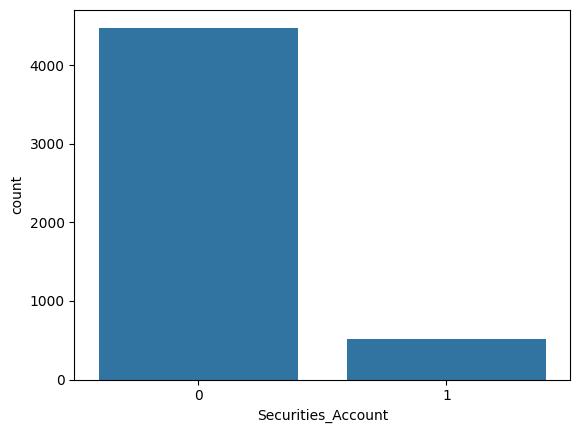

In [ ]:
sns.countplot(data= data, x= 'Securities_Account');

### Categorical Univariate Analysis Observations

Most customers around (90%) do not have a securities account.Only a small group around (10%) do.

**Inference:** Low engagement with investment products. Potential for investment advisory services or bundled offerings.

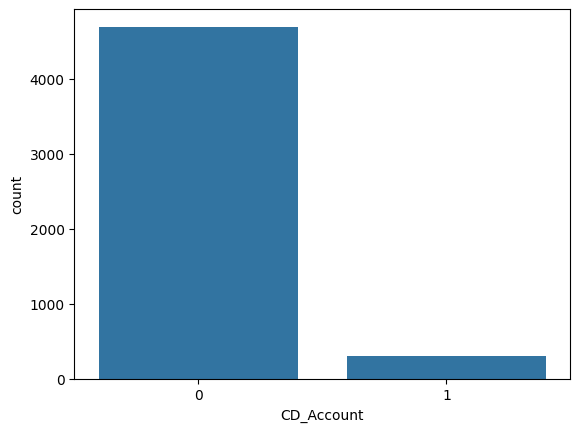

In [ ]:
sns.countplot(data= data, x= 'CD_Account');

### Categorical Univariate Analysis Observations

A very small percentage (~5–7%) of customers have a CD (Certificate of Deposit) account. Vast majority do not.

**Inference:** Could be a niche segment

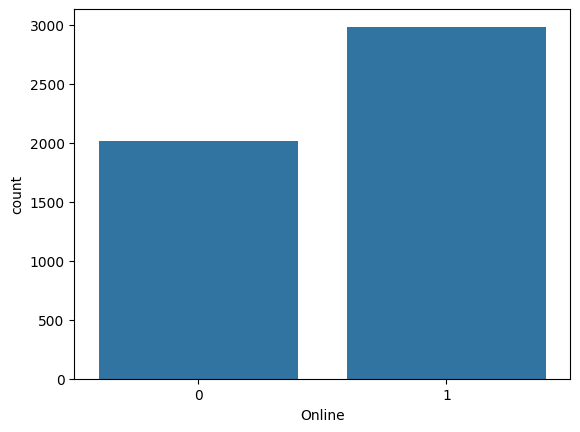

In [ ]:
sns.countplot(data= data, x= 'Online');

### Categorical Univariate Analysis Observations

Majority of customers (~60%) use online banking (1). ~40% still do not use online banking.

**Inference:** While online usage is common, there's still scope to digitally onboard offline users — useful for marketing strategy.

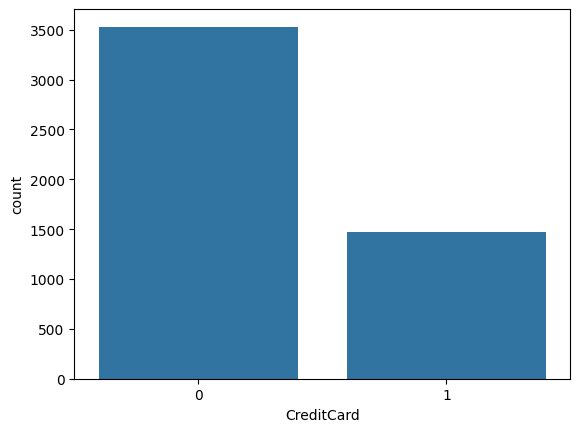

In [ ]:
sns.countplot(data= data, x= 'CreditCard');

**Categorical Univariate Analysis Observations**

Majority (~70%) do not own a credit card. ~30% do own one.

**Inference:**

Credit card ownership is relatively low.Can be a cross-selling opportunity.

#Multivariare Aanalysis

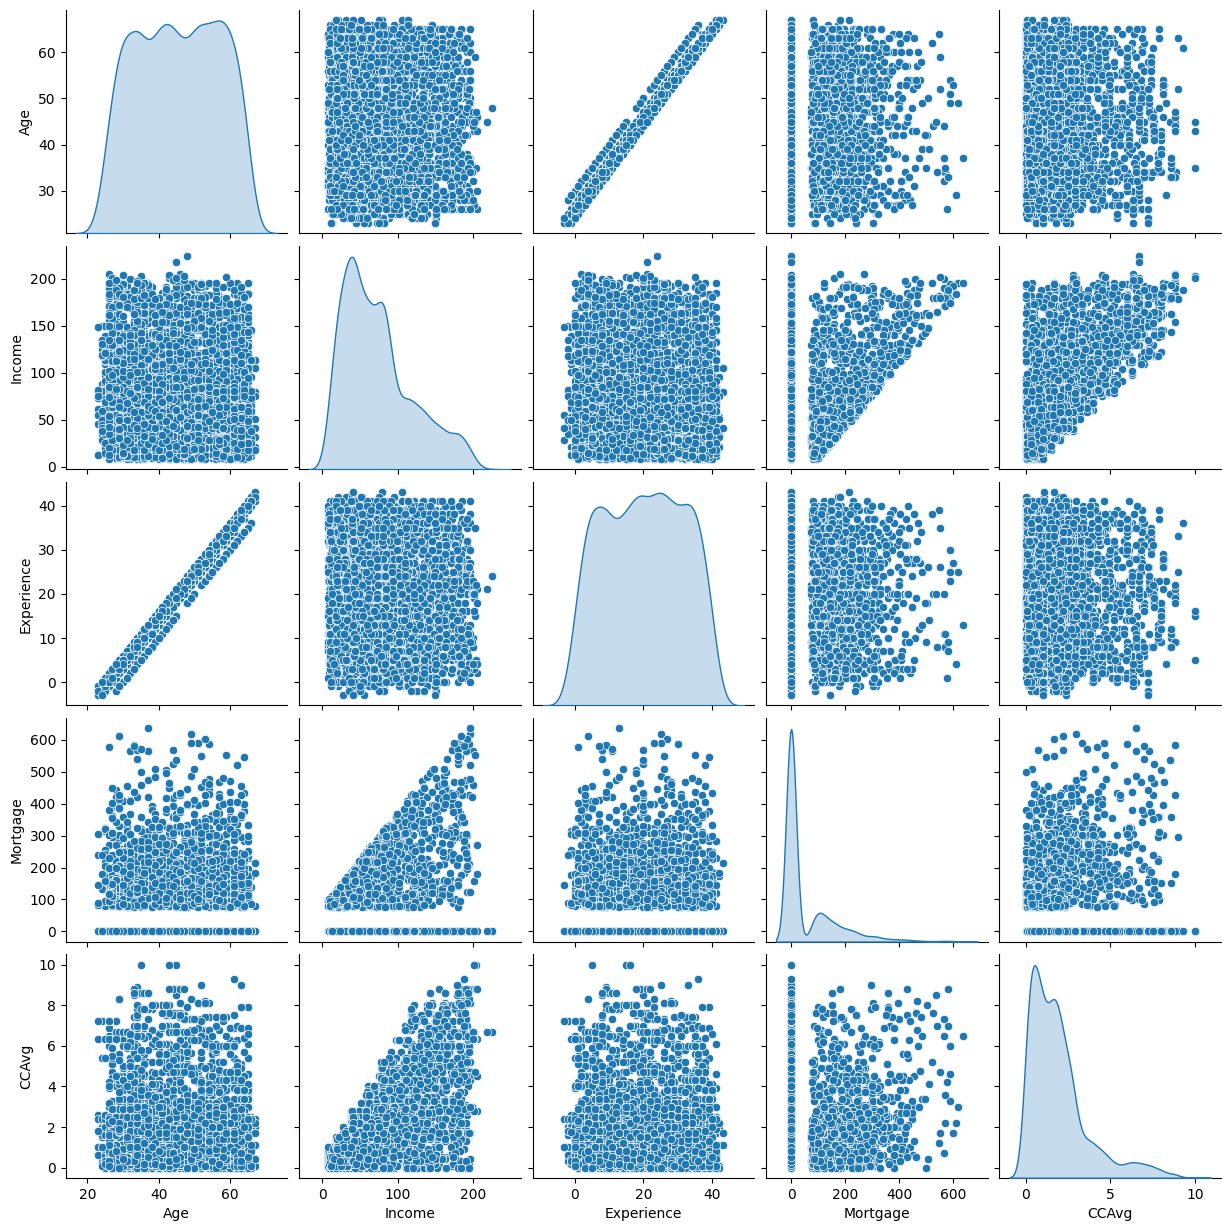

In [ ]:
# Plotting a pair plot to under the distribution of the numerical variables in the dataset.
selected_variables = ['Age', 'Income', 'Experience', 'Mortgage', 'CCAvg']
sns.pairplot(data[selected_variables], diag_kind='kde');

**Numerical BiVariate Analysis Observations**

*   **Age vs Experience:** Strong linear correlation. Suggests Experience ≈ Age – 22 or so (logical and expected). Redundant for modeling if both are used without adjustment.

*   **Income vs CCAvg:** Moderate positive correlation. As income increases, average credit card spending tends to increase. This is an intuitive relationship and could be important for predicting credit needs.

*   **Income vs Mortgage:** Slight positive relationship, but widely scattered.
Some high-income individuals have no mortgage; others have very high ones.
Indicates mortgage amount isn't strictly dependent on income alone.
*   **CCAvg vs Mortgage:** No clear trend — appears widely scattered.Credit card usage and mortgage amount are largely independent.
*  **Other variable pairs** (e.g., Age vs Income, Age vs CCAvg, etc.)
No significant linear relationship. Data is spread out randomly, implying independence between most variable pairs.

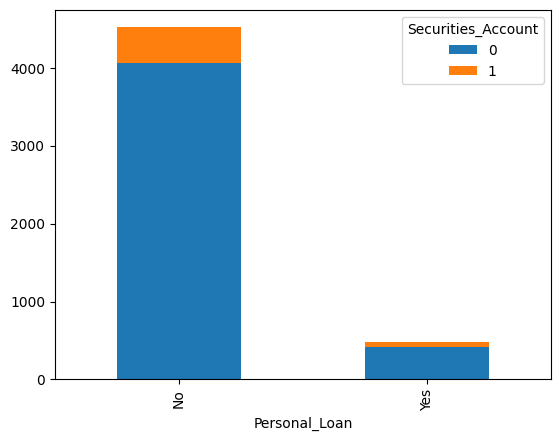

In [ ]:
personal_Securities = pd.crosstab(data['Personal_Loan'], data['Securities_Account'])
personal_Securities.plot(kind='bar', stacked=True)
plt.show()

**Categorical Bivariate Analysis Observations**

**Securities Account vs Personal Loan:** majority do not have a securities account. Among those who took a personal loan, there's a slightly higher percentage with a securities account than among those who did not.

**Inference:** Having a securities account could indicate financial maturity or better customer engagement, possibly increasing loan eligibility.

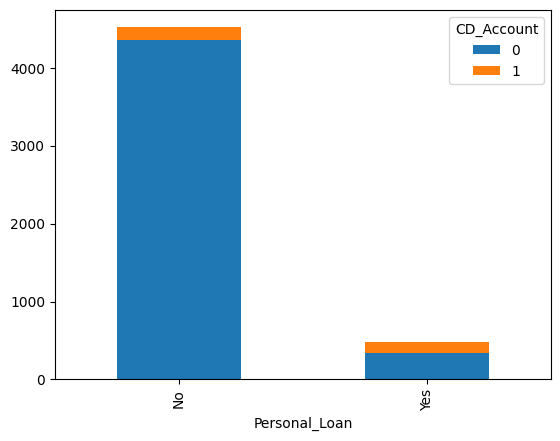

In [ ]:
personal_CD = pd.crosstab(data['Personal_Loan'], data['CD_Account'])
personal_CD.plot(kind='bar', stacked=True)
plt.show()

**Categorical Univariate Analysis Observations**

**CD Account vs Personal Loan:** Very few customers have a CD account overall.
 But, among those who took a loan, the proportion with CD accounts is noticeably higher than those who didn’t.

**Inference:** Customers with a CD account are more likely to take a personal loan. Possibly a strong predictor.

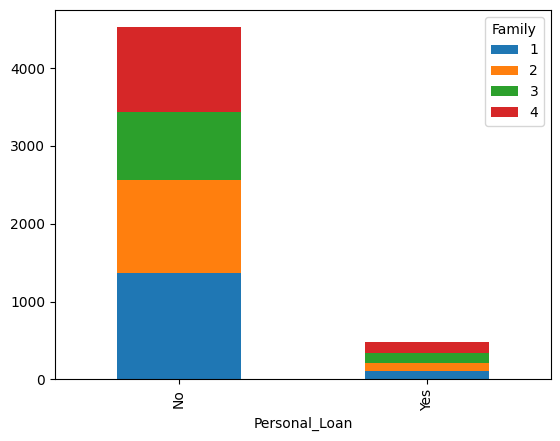

In [ ]:
personal_Family = pd.crosstab(data['Personal_Loan'], data['Family'])
personal_Family.plot(kind='bar', stacked=True)
plt.show()

**Categorical Univariate Analysis Observations**

**Family Size vs Personal Loan** Family size distribution is similar in both groups. Slightly higher tendency toward loans among customers with 2–3 family members.

**Inference:** No strong impact, but mid-sized families might correlate mildly with loan interest.

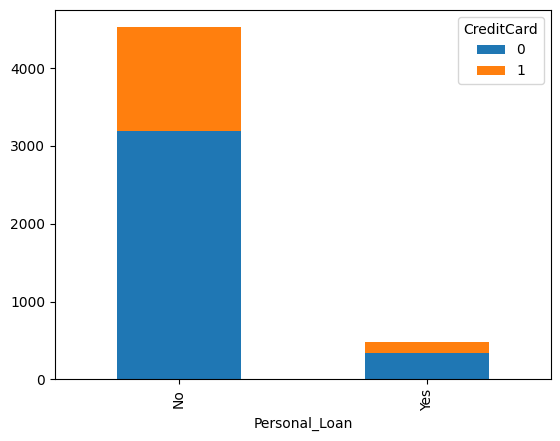

In [ ]:
personal_CC = pd.crosstab(data['Personal_Loan'], data['CreditCard'])
personal_CC.plot(kind='bar', stacked=True)
plt.show()

**Categorical Univariate Analysis Observations**

**Credit Card vs Personal Loan:** Most customers (both loan takers and non-takers) do not have a credit card (0). However, a relatively higher proportion of loan takers have a credit card compared to non-takers.

**Inference:** Owning a credit card may slightly increase the likelihood of taking a personal loan.

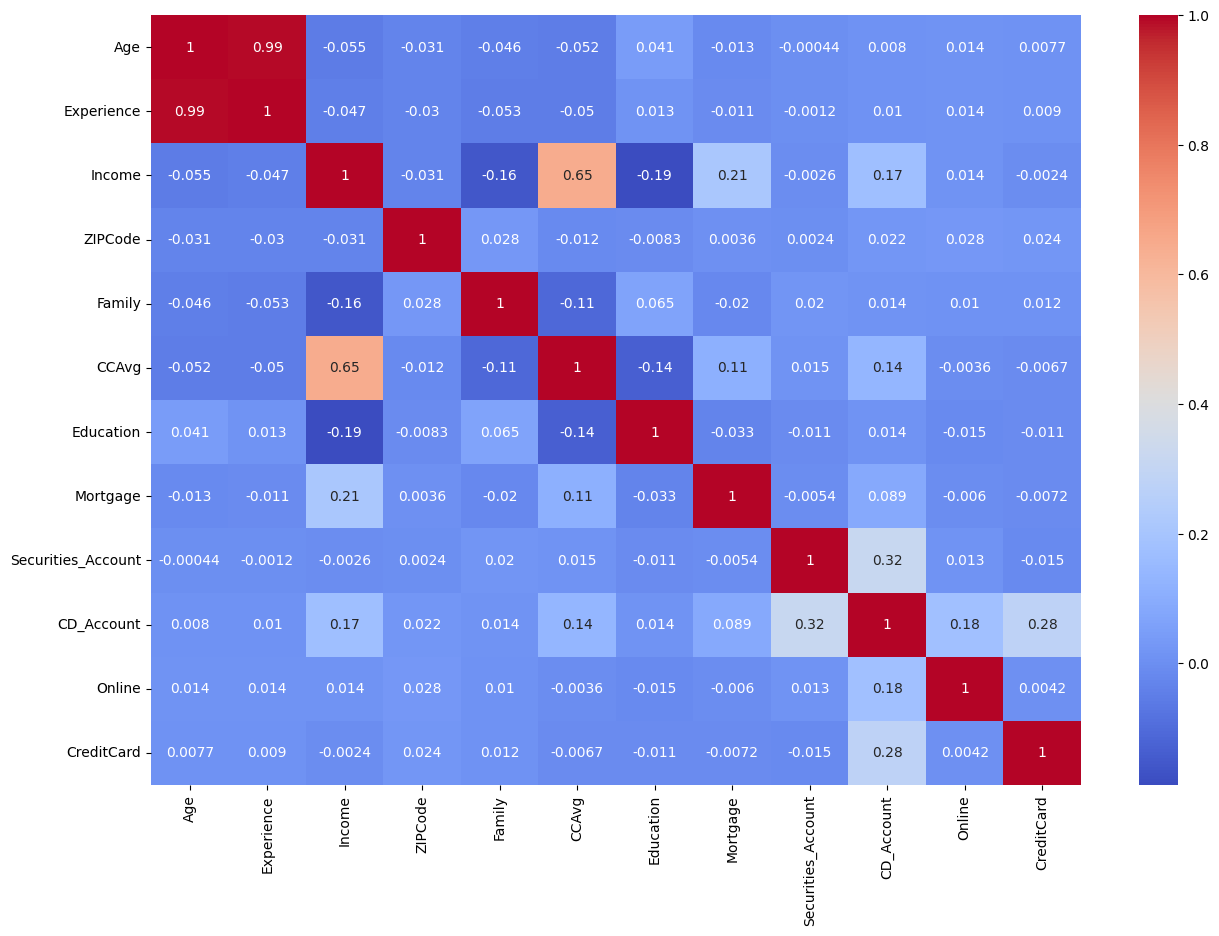

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(numeric_only=True),annot=True, cmap='coolwarm');
plt.show()

**Multivariate Analysis Observations**

*   **Age Vs Experience:** +0.99,	Extremely strong correlation — likely redundant; one can be dropped
*   **Income Vs CCAvg:** +0.65,	High correlation; higher income generally leads to higher credit card spending
*   **CD Account Vs Securities Account:** +0.32,	Moderate; customers with one are more likely to have the other
*   **CD Account Vs CreditCard:** 	+0.28,	Moderate; CD account holders tend to also hold credit cards
*   **CD Account Vs Online:**	 +0.18	Mild correlation — customers with CD accounts also tend to use online banking


**Most features are independent of each other.**

This is good for modeling, as it avoids multicollinearity (except Age-Experience).

**Features like:**

Education, ZIPCode, Mortgage, Family, Online, and CreditCard show minimal correlation with others.

#Train Test Data Splitting

In [ ]:
X= data.drop('Personal_Loan', axis=1)
y= data['Personal_Loan']

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify= y, random_state=42)

In [ ]:
# Visualizing the shapes of the train and test split sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 12)
(1000, 12)
(4000,)
(1000,)


In [ ]:
# Computing the percentage of classes in train set split to confirm equal propotions of Yes and No
train_class_percentages = y_train.value_counts(normalize=True) * 100
print("Percentage of classes in y_train:")
print(train_class_percentages)

Percentage of classes in y_train:
Personal_Loan
No     90.4
Yes     9.6
Name: proportion, dtype: float64


In [ ]:
# Computing the percentage of classes in test set split to confirm equal propotions of Yes and No
test_class_percentages = y_test.value_counts(normalize=True) * 100
print("\nPercentage of classes in y_test:")
print(test_class_percentages)


Percentage of classes in y_test:
Personal_Loan
No     90.4
Yes     9.6
Name: proportion, dtype: float64


#Decision Tree Building

In [ ]:
# Default Decision Tree Model building
dtree1= DecisionTreeClassifier(random_state=42)
dtree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Defining a function to include the model evaluation metric parameters**

In [ ]:
 # A funtion to use different model and predict evaluation scores for different predictors and target
def model_performance_classification(model, preditors, target):

  # Model prediction object within the function
  pred= model.predict(preditors)

  # Accuracy score computing object within the function
  acc= accuracy_score(target, pred)

  # recall score computing object within the function
  recall= recall_score(target, pred, pos_label='Yes')

  # precision score computing object within the function
  precision= precision_score(target, pred, pos_label='Yes')

  # F1_ score computing object within the function
  f1= f1_score(target, pred, pos_label='Yes')


  # Combinig the evalution score for the mertiorc into a data frame.
  df_perf= pd.DataFrame({'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1}, index= [0])
  return df_perf

**Defining a function to copmute confusion matrix for the different trees**

In [ ]:
# A funtion to use different model and plot confusion matrix for different predictors and target
def plot_confusion_matrix(model, predictors, target):

    # Model prediction object within the function to predict the target
    y_pred = model.predict(predictors)

    # Object to compute the confusion matrix comparing the true target values with the predicted values
    cm = confusion_matrix(target, y_pred)

    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item/cm.flatten().sum())]   # CM Flatten to flatten the 2*2 confusion matrix into 1D array
            for item in cm.flatten() # comprehension that iterates through each element (item) in the flattened confusion matrix.
        ]
    ).reshape(2, 2)    # reshaping to a matrix

# "{0:0.0f}".format(item): This formats the count (item) as an integer with no decimal places.
#"{0:.2%}".format(item / cm.flatten().sum()): This calculates the percentage for the current cell.

    # Set the figure size for the plot
    plt.figure(figsize=(6, 4))

    # Plot the confusion matrix as a heatmap with the labels
    sns.heatmap(cm, annot=labels, fmt="")

    # Add a label to the y-axis
    plt.ylabel("True label")

    # Add a label to the x-axis
    plt.xlabel("Predicted label")

**Decision Tree Model Evalution**

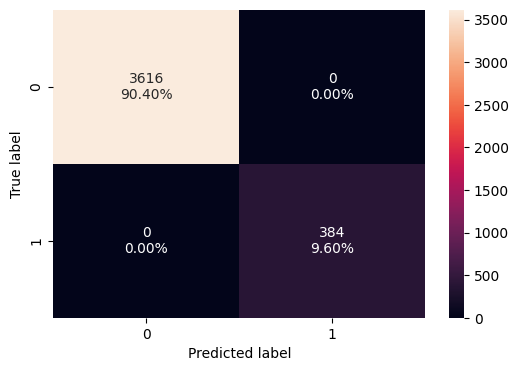

In [ ]:
# Plotting the confusion matrix for the default decision tree classifier dtree1 on train data
plot_confusion_matrix(dtree1, X_train, y_train)

In [ ]:
# Evaluating the decision tree model performance on train data

# Calling the function to  predict evaluation scores for dtree 1 model, by predictors X_train and target y_train
dtree1_train_perf = model_performance_classification(

    dtree1, X_train, y_train
)
dtree1_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Confusion Matrix & Metrics Observations on Train Data**

**Perfect classification:** All 4000 test cases were predicted 100% correctly.

**Suspiciously perfect:** This could indicate Overfitting on a training dataset


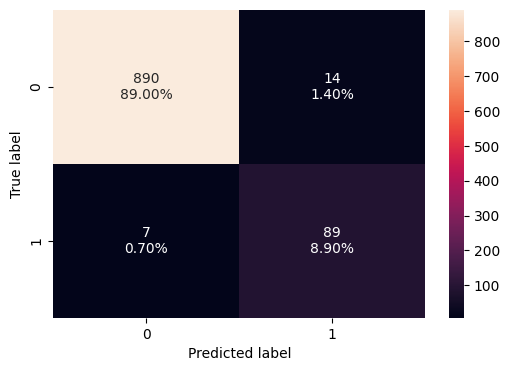

In [ ]:
# Plotting the confusion matrix for the default decision tree classifier dtree1 on test data
plot_confusion_matrix(dtree1, X_test, y_test)

In [ ]:
# Evaluating the decision tree model performance on test data

# Calling the function to  predict evaluation scores for dtree 1 model, by predictors X_test and target y_test
dtree1_test_perf = model_performance_classification(

    dtree1, X_test, y_test
)
dtree1_test_perf

,Accuracy,Recall,Precision,F1
0,0.979,0.927083,0.864078,0.894472


**Confusion Matrix & Metrics Observations on Test Data**

**Good performance on test data:**

*   High accuracy (97.9%) despite class imbalance.
*   Recall (92.7%) indicates the model can detect most of the actual loan takers (positives).
*   Precision (86.4%) shows relatively few false positives.
*   F1 Score (89.4%) is strong, showing a good balance of precision and recall.

**Few misclassifications:**

*   Only 14 customers were falsely predicted as loan takers.
*   Only 7 loan takers were missed







**Visualizing the default Decision Tree**

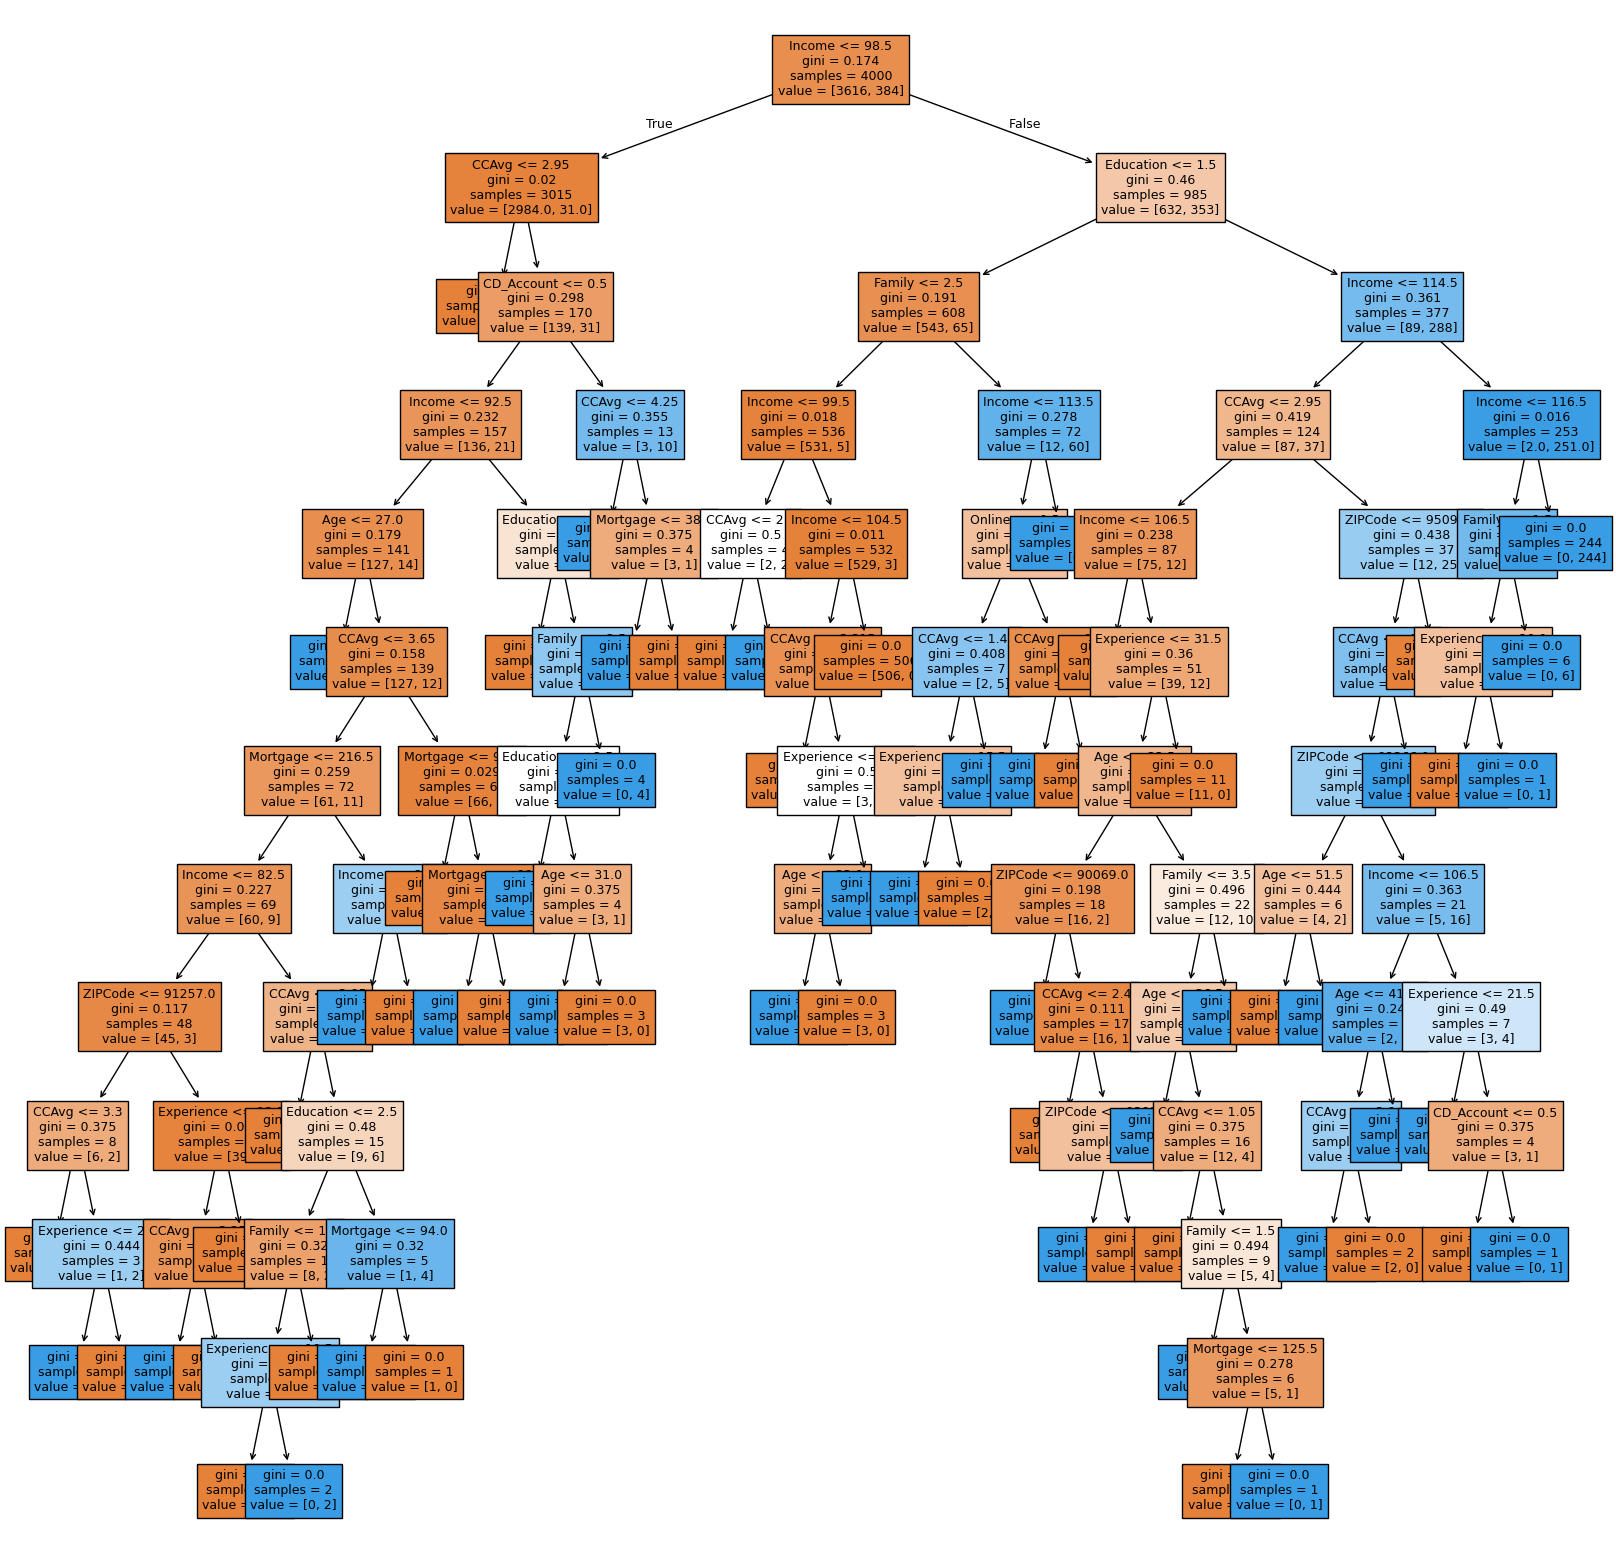

In [ ]:
feature_names = list(X_train.columns) # listing the feature names in X_train


plt.figure(figsize=(20, 20)) # setting the figure size for the plot


out = tree.plot_tree( # plotting the decision tree
    dtree1,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text( #function from the sklearn.tree module generates a text representation of the decision tree [1].
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: No
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: Yes
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 91257.00
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: No
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.30
|   |   |   |   |   |   |   |   |   |   |--- Experience <= 20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Experience >  20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: No
|   |   |   |   |   |

**Default Decision Tree Observations**



*   From the decision tree its clearly evident overfitting in the model, as the model tries to classify till the sample sizes are clearly homegeneous at the leaf node. This makes the decision tree really complex and huge.
*   Also based on the model evaluation metrics there is a good difference between the model predition on the train and test data set on the precision and F1_score which is not a acceptable number for a good deision tree classifier.
*   Customers with, High income, High credit card spending, CD accounts, And sometimes higher education, are far more likely to take personal loans.
*   Customers with, Low income, Low spending, No CD/Securities accounts tend to avoid loans.

#PrePruning the Decision Tree

This section of the code focuses on finding the best set of parameters for a
Decision Tree Classifier model. The goal is to improve the model's performance
and generalize well to unseen data.

In [ ]:
# Defining the Hyper Parameters for Pruning the Tree
max_depth_values = np.arange(2, 11, 2) # Define the range of values for tree depth
max_leaf_nodes_values = np.arange(10, 51, 10) # Define the range of values for max leaf Nodes in the tree
min_samples_split_values = np.arange(10, 51, 10) # Define the range of values for min samples splits in the tree

best_estimator = None # initialize variables to store the best model and its performance
best_score_diff = float('inf')

for max_depth in max_depth_values: # These nested loops iterate through all combinations of max_depth, max_leaf_nodes and min_samples_split.
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            estimator = DecisionTreeClassifier( # initialize the tree with the current set of parameters
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            estimator.fit(X_train, y_train) # fit the model to the training data

            y_train_pred = estimator.predict(X_train) # make predictions on the training and test sets
            y_test_pred = estimator.predict(X_test)


            train_f1_score = f1_score(y_train, y_train_pred, pos_label='Yes') # calculate F1 scores for training and test sets
            test_f1_score = f1_score(y_test, y_test_pred, pos_label='Yes')

            score_diff = abs(train_f1_score - test_f1_score) # calculate the absolute difference between training and test F1 scores

            if score_diff < best_score_diff:  # update the best estimator and best score if the current one has a smaller score difference
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# creating an instance of the best model
dtree2 = best_estimator

# fitting the best model to the training data
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(2), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

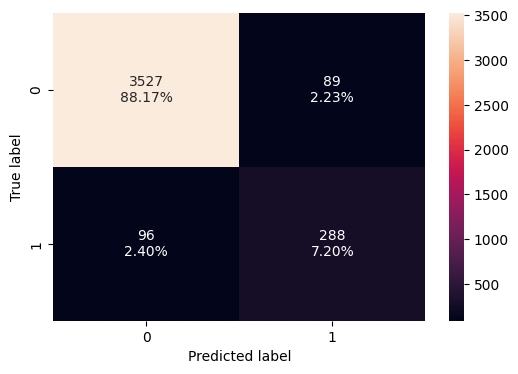

In [ ]:
# Plotting the confusion matrix for the prepruned decision tree classifier dtree2 on train data
plot_confusion_matrix(dtree2, X_train, y_train)

In [ ]:
# Evaluating the prepruned decision tree model performance on train data
dtree2_train_perf = model_performance_classification(

    dtree2, X_train, y_train
)
dtree2_train_perf

,Accuracy,Recall,Precision,F1
0,0.95375,0.75,0.763926,0.756899


**Confusion Matrix & Metrics Observations on Train Data**

**True Negatives (TN):** 3527 — Correctly predicted as not taking a personal loan.

**True Positives (TP):** 288 — Correctly predicted as taking a personal loan.

**False Negatives (FN):** 96 — Actually took loan, but predicted as "No".

**False Positives (FP):** 89 — Predicted as taking a loan, but actually didn’t.


**Metrics**

**Accuracy:** 95.4% — Very good overall correctness.

**Recall:** 75% — 75% of actual loan takers were correctly identified.

**Precision:** 76.4% — Of all predicted loan takers, 76.4% were actually correct.

**F1 Score:** 75.7% — Good balance between precision and recall.

**Inference:**
The model performs well on training data.

Some bias toward the majority class (No Loan) still exists (96 missed loan-takers).

Strong generalization if not overfitting

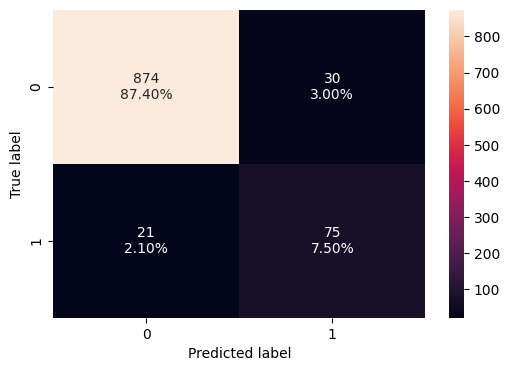

In [ ]:
# Plotting the confusion matrix for the prepruned decision tree classifier dtree2 on test data
plot_confusion_matrix(dtree2, X_test, y_test)

In [ ]:
# Evaluating the prepruned decision tree model performance on test data
dtree2_test_perf = model_performance_classification(

    dtree2, X_test, y_test
)
dtree2_test_perf

,Accuracy,Recall,Precision,F1
0,0.949,0.78125,0.714286,0.746269


**Confusion Matrix & Metrics Observations on Test Data**


**True Negatives (TN):** 874 — Correctly predicted as not taking a personal loan.

**True Positives (TP):** 75 — Correctly predicted as taking a personal loan.

**False Negatives (FN):** 21 — Actually took loan, but predicted as "No".

**False Positives (FP):** 30 — Predicted as taking a loan, but actually didn’t.


**Metrics**

**Accuracy:** 94.9% — Nearly identical to training accuracy (good sign).

**Recall:** 78.1% — Slightly better than training set (fewer false negatives).

**Precision:** 71.4% — Slightly lower, due to slightly more false positives.

**F1 Score:** 74.6% — Balanced and consistent with training.


**Inference:**

Model generalizes well to unseen data.

Slight drop in precision suggests some extra false positives in prediction.

Still maintains high recall, meaning it catches most of the actual loan takers.

**Conclusions**

The model is well-balanced and does not overfit.

It shows a good trade-off between precision and recall, which is crucial in personal loan prediction (false positives and false negatives both have cost).

Slight class imbalance exists (as seen from previous charts), but the model handles it reasonably well.

###Visulaizing the Pre Pruned Decision Tree

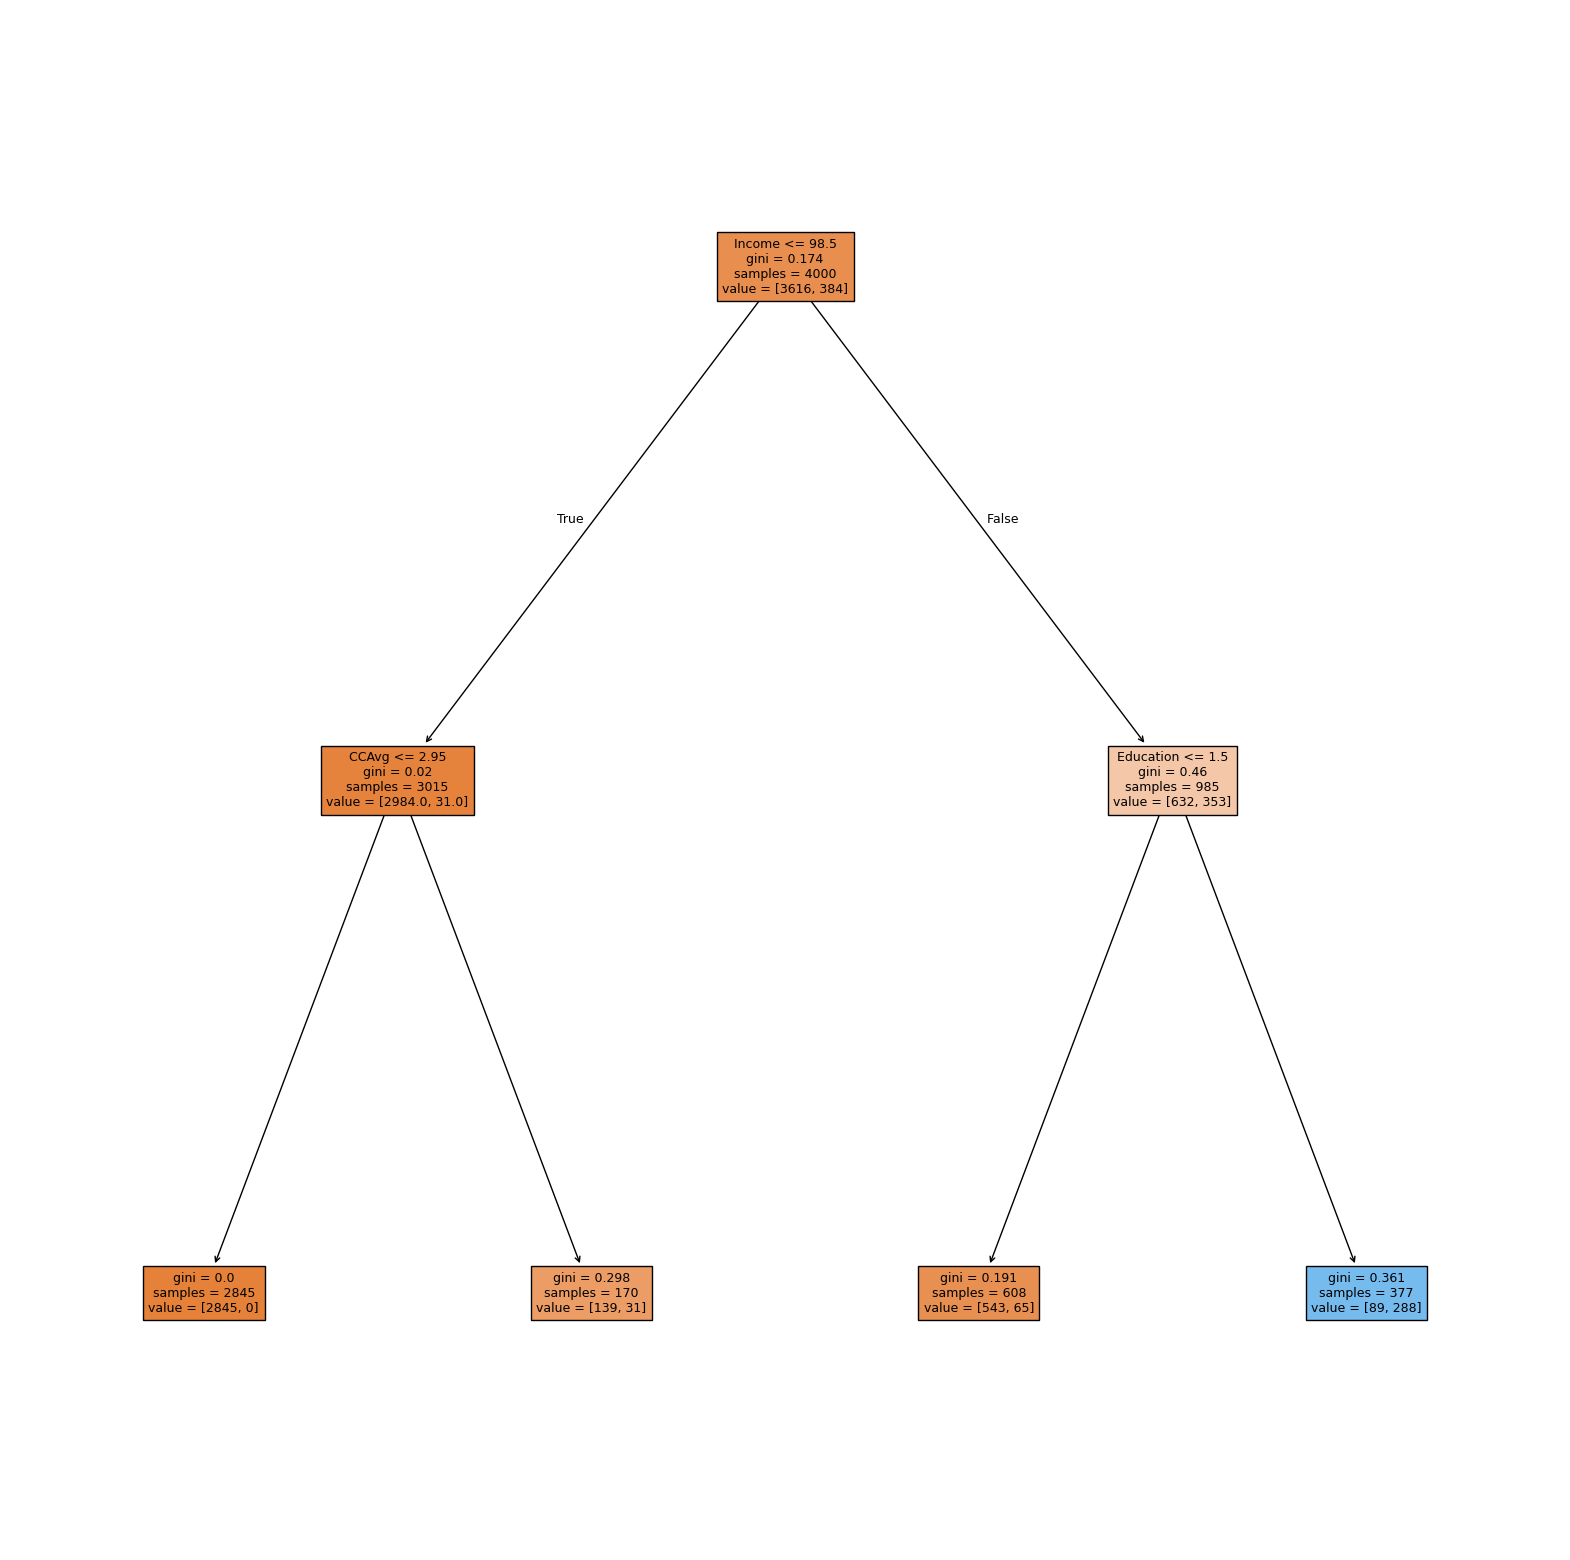

In [ ]:
feature_names = list(X_train.columns) # listing the feature names in X_train


plt.figure(figsize=(20, 20)) # setting the figure size for the plot


out = tree.plot_tree( # plotting the decision tree
    dtree2,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text( #function from the sklearn.tree module generates a text representation of the decision tree [1].
        dtree1,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: No
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 27.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: Yes
|   |   |   |   |--- Age >  27.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- ZIPCode <= 91257.00
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 3.30
|   |   |   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: No
|   |   |   |   |   |   |   |   |   |--- CCAvg >  3.30
|   |   |   |   |   |   |   |   |   |   |--- Experience <= 20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Experience >  20.00
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: No
|   |   |   |   |   |

**Pre Pruned Decision Tree Observations**

*   Income is the strongest predictor.
*   For low-income customers, credit card usage helps distinguish intent/behavior.
*   For high-income customers, education level becomes the key differentiator.

#Post Pruning the Decision Tree, Cost Complexity Pruning

**Computing CCP Alphas & Corresponding Impurities**

In [ ]:
# Create an fresh instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

#The cost_complexity_pruning_path() method is called on the decision tree classifier.
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
# Combining the alpha and impurity values into a dataframe
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000235,0.000471
2,0.000244,0.000958
3,0.000246,0.001451
4,0.000306,0.002369
5,0.000331,0.003361
6,0.000333,0.003695
7,0.000333,0.004028
8,0.000333,0.004361
9,0.000350,0.005411


**Plotting CCP Alpha values Against Corresponding Impurities**

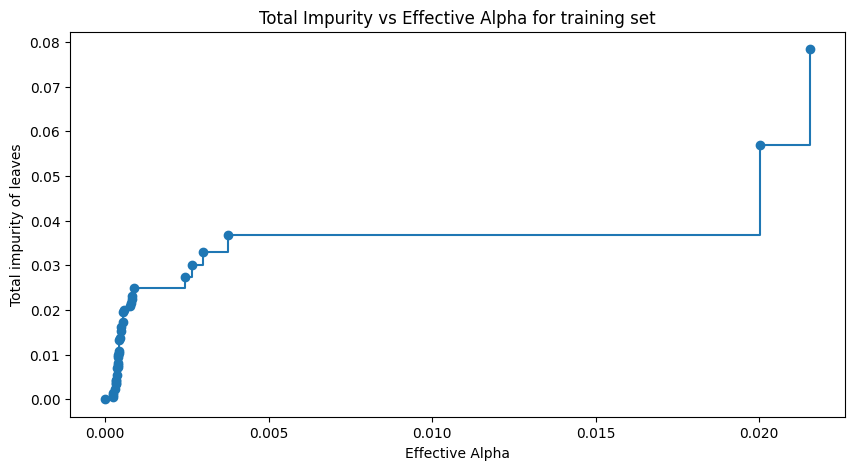

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

**CCP Alpha Vs Impurities Observations**

**At Alpha ≈ 0:**

*   Total impurity is near zero, indicating, The tree is very deep and perfectly fits the training data.
*   High likelihood of overfitting.

**Slight Increase in Alpha (0.0001 – 0.004):**

*   Gradual increase in total impurity.
*   The model is being pruned — removing nodes that contribute marginally to reducing impurity.
*   Still relatively low impurity ⇒ good balance of simplicity and accuracy.

**Alpha > 0.005 – 0.02:**

*   Impurity plateaus for a while, then jumps sharply after α ≈ 0.02.
*   Indicates over-pruning, resulting in a highly simplified tree that likely underfits the data.

**Steep Jumps in Impurity:**

*   Visible at the end of the curve, indicating sudden loss of structure (many nodes pruned at once).
*   The model loses too much detail → reduced performance.

**Conclusion:**

*   Ideal Alpha Range: Somewhere between 0.0005 and 0.004 — provides a low total impurity while reducing tree complexity.
*   Very low alpha → overfit (very pure leaves, overly complex tree).
*   Very high alpha → underfit (too much impurity, oversimplified).

In [ ]:
clfs = [] # Initialize an empty list to store the decision tree classifiers
for ccp_alpha in ccp_alphas: # Iterate over each ccp_alpha value extracted from cost complexity pruning path

    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42) # Create an instance of the DecisionTreeClassifier

    clf.fit(X_train, y_train) # Fit the classifier to the training data

    clfs.append(clf) # Append the trained classifier to the list

print(  # Print the number of nodes in the last tree along with its ccp_alpha value
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04760359071815694


### Plotting CCP Alpha values Against the Number of Nodes and Depth of the Tree

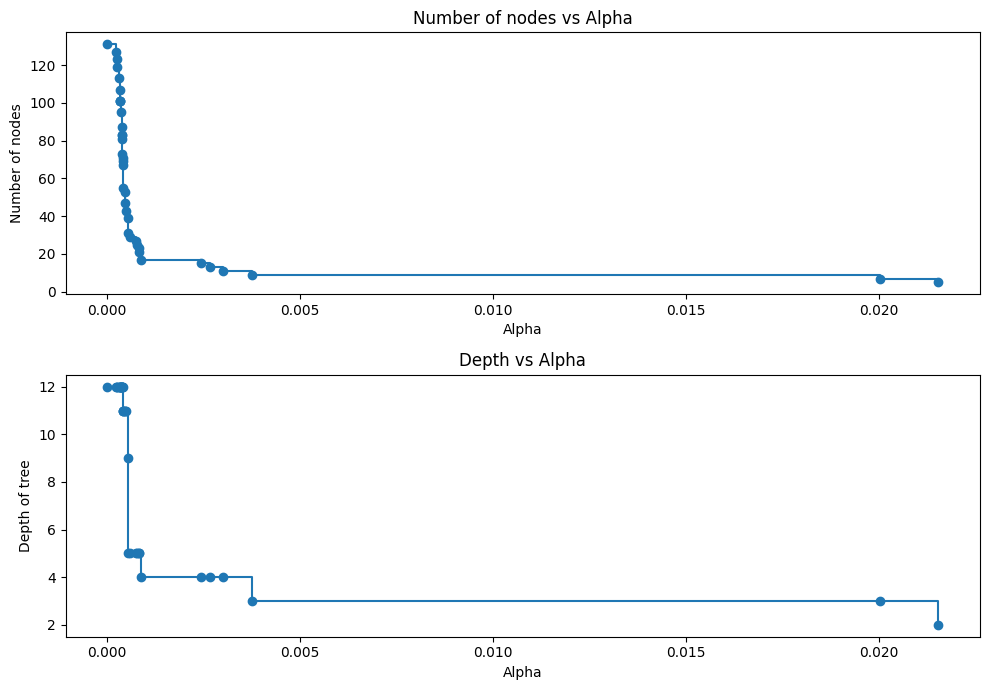

In [ ]:
clfs = clfs[:-1] # Remove the last classifier
ccp_alphas = ccp_alphas[:-1] # and corresponding ccp_alpha value from the lists

node_counts = [clf.tree_.node_count for clf in clfs] # Extract the number of nodes in each tree classifier using the .tree_.node_count attribute of a DecisionTreeClassifier

depth = [clf.tree_.max_depth for clf in clfs] # Extract the maximum depth of each tree classifier using the .tree_.max_depth attribute of a DecisionTreeClassifier

fig, ax = plt.subplots(2, 1, figsize=(10, 7)) # Create a figure and a set of subplots

ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post") # Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post") # Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

fig.tight_layout() # Adjust the layout of the subplots to avoid overlap

###CCP Alpha Vs Number of Nodes and Depth of the Tree Observations

**Number of Nodes vs Alpha**

**At very low alpha values (~0):**

*   The tree has the highest number of nodes (around 130).
*   This indicates a very large, complex tree, possibly overfitting.

**As alpha increases slightly:**

*   There's a sharp drop in node count — pruning aggressively reduces tree complexity.
*   Stabilizes to ~20 nodes around alpha ≈ 0.001

**For alpha > 0.004:**

*   Number of nodes drops below 10 — tree is heavily pruned, likely underfitting.

**Depth of Tree vs Alpha**

**At alpha ≈ 0,** the depth is maximum (12), again suggesting overfitting.

**As alpha increases:**

*   The depth drops sharply, leveling off to depth = 4 or 3 at moderate alpha values (~0.001–0.004).
*   Beyond alpha ≈ 0.02, depth is as low as 2, indicating an over-pruned, overly simplistic model.

**Conclusion:**

*   Low Alpha (~0): High depth and node count → Overfitting.
*   Moderate Alpha (0.001–0.004): Balanced complexity → Good trade-off (recommended range).
*   High Alpha (>0.01): Very shallow tree, minimal nodes → Likely underfitting.

### Computing the F1 Socres Using Post Pruned Tress on the Train Data

In [ ]:
train_f1_scores = []  # Initialize an empty list to store F1 scores for training set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train, pos_label='Yes')

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

### Computing the F1 Socres Using Post Pruned Tress on the Test Data

In [ ]:
test_f1_scores = []  # Initialize an empty list to store F1 scores for test set for each decision tree classifier

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test, pos_label='Yes')

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)

### Plotting the F1 Socres on the Train and Test Data against the CCP Alpha to Locate the Ideal Post Pruned Tree.

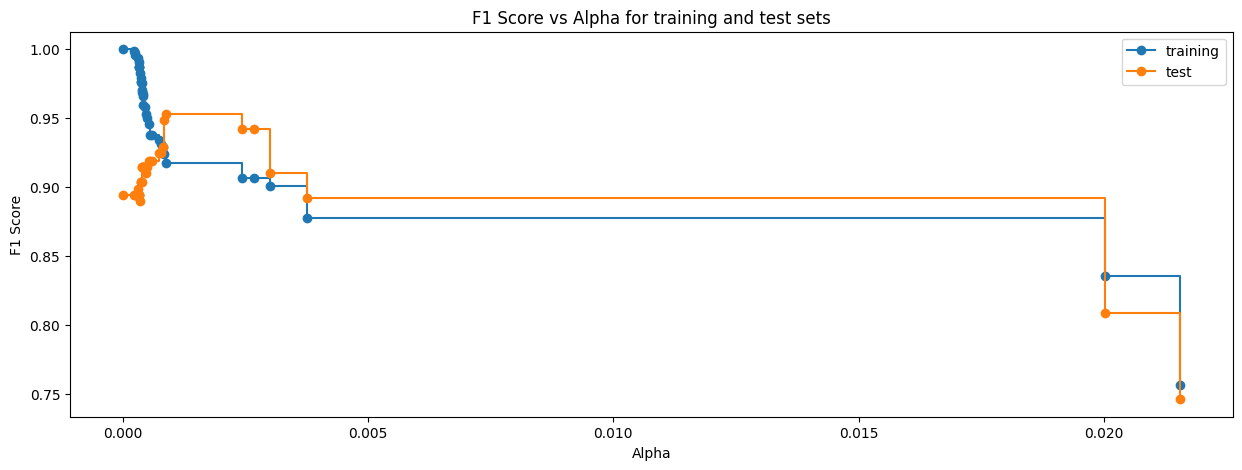

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

### F1 Socres on the Train and Test Data Vs CCP Alpha Observations

**Score Peaks at Very Low Alpha:**


*   Highest F1 scores (close to 1.0) occur when alpha is near 0, especially for the training set.
*   This indicates the model performs best with very minimal regularization.
*   F1 Score Drops with Increasing Alpha:
*   As alpha increases, both training and test F1 scores gradually drop.
*   This is expected: higher alpha means more regularization, reducing model complexity and potentially underfitting.

**Generalization Gap:**


*   The test and train curves are fairly close, suggesting good generalization across most alpha values.

*   However, at very high alpha values (right side of the plot), both scores drop significantly → model becomes too simplistic.

**Stable Region:**

*   There is a relatively stable region between alpha ≈ 0.001 to 0.005, where test F1 score remains high and consistent.
*  This is likely the sweet spot for alpha — good trade-off between bias and variance.

**Conclusion:**

*   Best Alpha Range: Very low alpha values (e.g., 0.0001 to 0.005) offer the highest F1 scores with minimal overfitting.
*   Avoid High Alpha: Alphas > 0.01 result in significant performance drop — model underfits.
*   Model Behavior: Regularization is necessary but should be minimal to preserve high performance.

### Plotting the Confusion Matrix for the Best Model of the Post Pruned Tree.

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree3 = clfs[index_best_model]
print(dtree3)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0008702884311333967),
                       random_state=42)


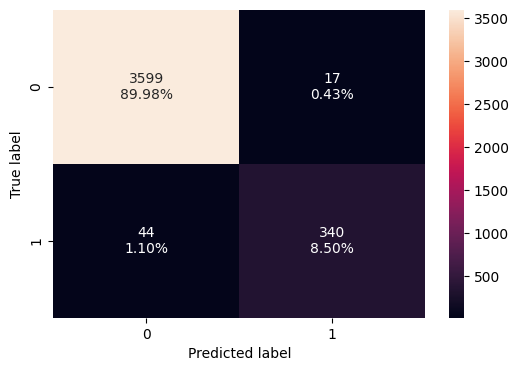

In [ ]:
plot_confusion_matrix(dtree3, X_train, y_train)

In [ ]:
dtree3_train_perf= model_performance_classification(
    dtree3, X_train, y_train # Calling the function to  predict evaluation scores for dtree 3 model, by predictors X_train and target y_train
)
dtree3_train_perf

,Accuracy,Recall,Precision,F1
0,0.98475,0.885417,0.952381,0.917679


###Confusion Matrix & Metrics Observations on Train Data

**Accuracy:** 98.475%

**Recall (Sensitivity):** 88.54%

**Precision:** 95.24%

**F1 Score:** 91.77%



**Inference:**


*   Very high **accuracy** and balanced performance across both classes.

*   Slightly lower **recall** indicates the model misses some actual positives (False Negatives = 44).
*   **Precision** is higher than recall, meaning when the model predicts "1", it's usually correct.
*  Suitable when **precision** is more important than **recall** (e.g., fewer false predicitons).

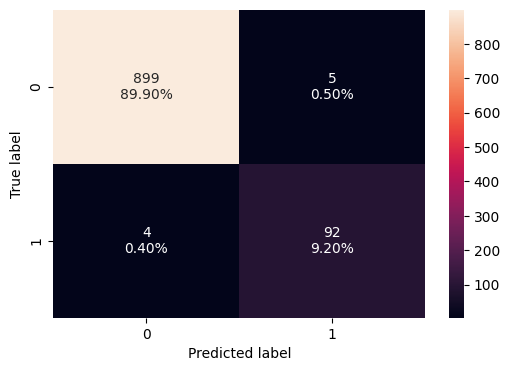

In [ ]:
plot_confusion_matrix(dtree3, X_test, y_test)

In [ ]:
dtree3_test_perf= model_performance_classification(
    dtree3, X_test, y_test # Calling the function to  predict evaluation scores for dtree 3 model, by predictors X_test and target y_test
)
dtree3_test_perf

,Accuracy,Recall,Precision,F1
0,0.991,0.958333,0.948454,0.953368


###Confusion Matrix & Metrics Observations on Test Data

**Accuracy:** 99.1%

**Recall:** 95.83%

**Precision:** 94.85%

**F1 Score:** 95.34%

**Inference:**

*   Even better performance than the first matrix.
*   Very few false negatives and false positives.
*   Recall is higher than in the previous model, capturing more true positives (only 4 missed).
*   Best overall balance between precision and recall.


**Conclusion:**

Bottom model is better overall, particularly in capturing true positives, making it more suitable in sensitive use cases where missing a positive is costly.

###Visulazing the Post Pruned Best Decision Tree

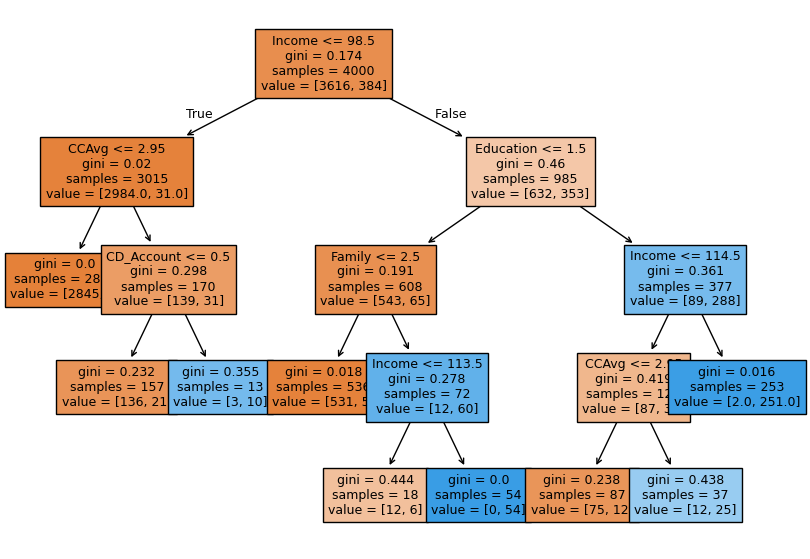

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(10, 7))

# plotting the decision tree
out = tree.plot_tree(
    dtree3,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree3,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2845.00, 0.00] class: No
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [136.00, 21.00] class: No
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: Yes
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [531.00, 5.00] class: No
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [12.00, 6.00] class: No
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 54.00] class: Yes
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.95
|   |   |   |   |--- weights: [75.00, 12.00] class: No
|   |   |   |--- CCAvg >  2.95
|   |   |   |   |--- weights: [12.00, 25.00] class: Yes
|   |   |--- Income >  114.50
|   |   |   |--- weights: [2.00, 251.00] class: Yes



### Post Pruned Best Decision Tree Observations


*   Income, Education, CCAvg, and CD_Account are key splitting features.
*   Income is the most decisive factor for the model.
*   Model is pruned well to avoid overfitting: fewer nodes, high purity.
*   The tree provides interpretable and confident decisions in most cases (evident from pure leaf nodes).

#Model Performance Comparision

##Train Data Performance Comparision Between, Default, Pre Pruned Best & Post Pruned Best Decision Tree

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree1_train_perf.T,
        dtree2_train_perf.T,
        dtree3_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.953750,0.984750
Recall,1.0,0.750000,0.885417
Precision,1.0,0.763926,0.952381
F1,1.0,0.756899,0.917679


**Overall Conclusion**


*  The **default tree** is highly overfitted.

*   **Pre-pruning** sacrifices too much recall and overall balance.
*   **Post-pruning** provides the best trade-off between avoiding overfitting and maintaining strong performance, making it the preferred approach in this comparison.

## Test Data Performance Comparision Between, Default, Pre Pruned Best & Post Pruned Best Decision Tree

In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [
        dtree1_test_perf.T,
        dtree2_test_perf.T,
        dtree3_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.979000,0.949000,0.991000
Recall,0.927083,0.781250,0.958333
Precision,0.864078,0.714286,0.948454
F1,0.894472,0.746269,0.953368


**Overall Conclusion**

*   **Default tree:** High accuracy and recall but lower precision and some overfitting signs.

*   **Pre-pruned tree:** Underfits, resulting in poor recall and precision.
*   **Post-pruned tree**: Best overall, with high test performance and a balanced precision-recall trade-off — the most generalizable and robust option.

###Feature Importance Computing

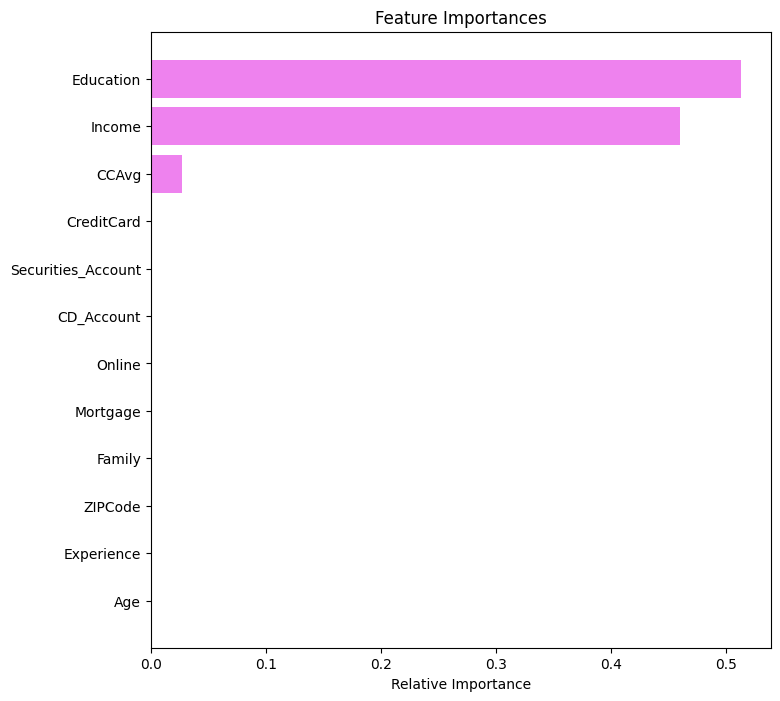

In [ ]:
# importance of features in the tree building
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

**Most Important Features:**

*   **Education** is the most important feature, with a relative importance of slightly above 0.5.
*    This indicates that a person's education level is a critical predictor in the model.

*   **Income** is the second most influential feature, contributing just under 0.5 to the model’s predictions.

**Moderately Important :**

*   **CCAvg** (average credit card spending) shows minor importance but is still used in the model.

**Least/Non-Contributing Features:**

*   Features like **CreditCard, Securities_Account, CD_Account, Online, Mortgage, Family, ZIPCode, Experience, and Age** have zero importance, indicating that they are not used by the model for making predictions.

The **Pre Pruned Decision Tree** relies heavily on income and education to make predictions, possibly indicating that these features have the strongest correlation with the target variable.

There may be an opportunity to remove or reassess the relevance of features with zero importance, which could simplify the model without impacting performance.

**Processing Speed Computation**

**Prediction Processing time for the Default Tree**

In [92]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:10, :]

# making a prediction
approval_prediction = dtree1.predict(applicant_details)

print(approval_prediction)

['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
CPU times: user 5 ms, sys: 58 µs, total: 5.05 ms
Wall time: 10.7 ms


**Prediction Processing time for the Pre Pruned Tree**

In [91]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:10, :]

# making a prediction
approval_prediction = dtree2.predict(applicant_details)

print(approval_prediction)

['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
CPU times: user 3.84 ms, sys: 0 ns, total: 3.84 ms
Wall time: 3.94 ms


Prediction Processing time for the Post Pruned Tree

In [90]:
%%time
# choosing a data point
applicant_details = X_test.iloc[:10, :]

# making a prediction
approval_prediction = dtree3.predict(applicant_details)

print(approval_prediction)

['No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
CPU times: user 4.58 ms, sys: 27 µs, total: 4.61 ms
Wall time: 9.13 ms


**Observations**



*   The precessing time for the default tree to predict 10 details is 10.7 ms
*   The precessing time for the pre pruned tree to predict 10 details is 3.94 ms
*   The precessing time for the post pruned tree to predict 10 details is 9.13 ms
*   Interms of speed of processing the Pre Pruned best decision tree has an very good processing speed than the other two.







**Likelihood of Probability Predction**

**Likelihood of Probablity Prediction of the Default Decision Tree**

In [103]:
# making a prediction
approval_likelihood = dtree1.predict_proba(applicant_details)

print(approval_likelihood[1, 1])

1.0


**Likelihood of Probablity Prediction of the Pre Pruned Decision Tree**

In [101]:
# making a prediction
approval_likelihood = dtree2.predict_proba(applicant_details)

print(approval_likelihood[1, 1])

0.7639257294429708


**Likelihood of Probablity Prediction of the Post Pruned Decision Tree**

In [100]:
# making a prediction
approval_likelihood = dtree3.predict_proba(applicant_details)

print(approval_likelihood[1, 1])

0.9920948616600791


**Likelihood of Probabilty Predictions Observations**


*   The Default decision tree model is 100% confident in predicting that the applicant can avail a personal loan.
*   The Prepruned decision tree model is only 76% confident in predicting that the applicant can avail a personal loan.
*   The Postpruned decision tree model is 99% confident in predicting that the applicant can avail a personal loan.

*   This indicates that the Default tree overfits, the Pre pruned tree undefits and the Post Pruned tree fits the best.

**Observations and Suggestions**

**Securities** Account Holders
*   Customers with securities accounts show higher financial maturity and engagement.
*  Design personalized loan offers for these customers (e.g., lower interest rates, pre-approved limits).
*   Promote cross-selling through wealth management advisors.

**CD Account Holders**
*   Leverage CD account holders as prime prospects
*   Strong correlation between having a CD account and taking a personal loan.
*   Run focused campaigns offering loans secured against CDs or provide loyalty incentives to CD account holders.
*   Highlight the benefits of liquidity and quick access to funds.

**Family Size**

*   Promote to mid-sized families (2–3 members)
*   This group shows a mild increase in loan uptake.
*   Market loans tailored to family needs (e.g., home renovation, education, vacation).
*   Use targeted messaging around "supporting family dreams."

**Credit Card Holders**

*   Encourage credit card adoption as a stepping stone
*   Credit card holders show higher loan uptake, perhaps due to existing credit behavior.
*   Incentivize credit card applications (e.g., cashback, fee waivers) with the intention of later cross-selling loans.
*   Educate about building a credit score and its benefits for loan eligibility.

**Financial literacy and engagement campaigns**
*   Customers with higher financial maturity seem more open to loans.
*   Conduct webinars or in-branch sessions explaining how loans can support life goals without financial strain.
*   Provide personalized financial health reports, showing them their eligibility and potential benefits.

Use personalized data-driven marketing

*   Since data suggests certain features correlate with higher loan interest
*   Run propensity models to score customers on their likelihood to take a loan.
*   Send personalized messages (SMS, email, app notifications) highlighting pre-approved or special offers.

**Remove barriers through flexible offers**

*   Some customers might hesitate due to rigid terms.
*   Offer flexible repayment plans or payment holidays (e.g., defer first EMI).
*   Allow partial disbursal or step-up EMI options.


**Summary Strategy**

**Focus on:**
*   Cross-selling to engaged customers (securities & CD account holders).
*   Building credit usage as a foundation.
*   Promoting family-oriented use cases.
*   Personalized, data-backed outreach.